In [2]:
# get data from google drive - optained via BERTopic 
import pandas as pd

file_path = '/Users/andreeanistor/Google Drive/My Drive/MS_DS_NLP_project/bertopics_reddit_aba_posts.csv'
aba_posts = pd.read_csv(file_path)
aba_posts.info() # no missing data, documents text has been cleaned previously

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Document                 3560 non-null   object 
 1   Topic                    3560 non-null   int64  
 2   Name                     3560 non-null   object 
 3   Representation           3560 non-null   object 
 4   Representative_Docs      3560 non-null   object 
 5   Top_n_words              3560 non-null   object 
 6   Probability              3560 non-null   float64
 7   Representative_document  3560 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 198.3+ KB


In [3]:
aba_posts.head(3) 

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,As an autistic person please listen to us when...,4,4_aba_bcba_rbt_bcbas,"['aba', 'bcba', 'rbt', 'bcbas', 'rbts', 'field...",['I had ABA and have nothing bad to say of it'...,aba - bcba - rbt - bcbas - rbts - field - hour...,1.0,False
1,My daughter who has down syndrome and autism d...,4,4_aba_bcba_rbt_bcbas,"['aba', 'bcba', 'rbt', 'bcbas', 'rbts', 'field...",['I had ABA and have nothing bad to say of it'...,aba - bcba - rbt - bcbas - rbts - field - hour...,1.0,False
2,One bit of word from an autistic adult Stop AB...,4,4_aba_bcba_rbt_bcbas,"['aba', 'bcba', 'rbt', 'bcbas', 'rbts', 'field...",['I had ABA and have nothing bad to say of it'...,aba - bcba - rbt - bcbas - rbts - field - hour...,1.0,False


In [4]:
aba_posts.Top_n_words[0]

'aba - bcba - rbt - bcbas - rbts - field - hours - slp - therapy - ot'

In [5]:
aba_posts.Representative_Docs[0]

'[\'I had ABA and have nothing bad to say of it\', \'I know what ABA is but what s PBIS\', "I don\'t do ABA on myself I go to ABA therapy"]'

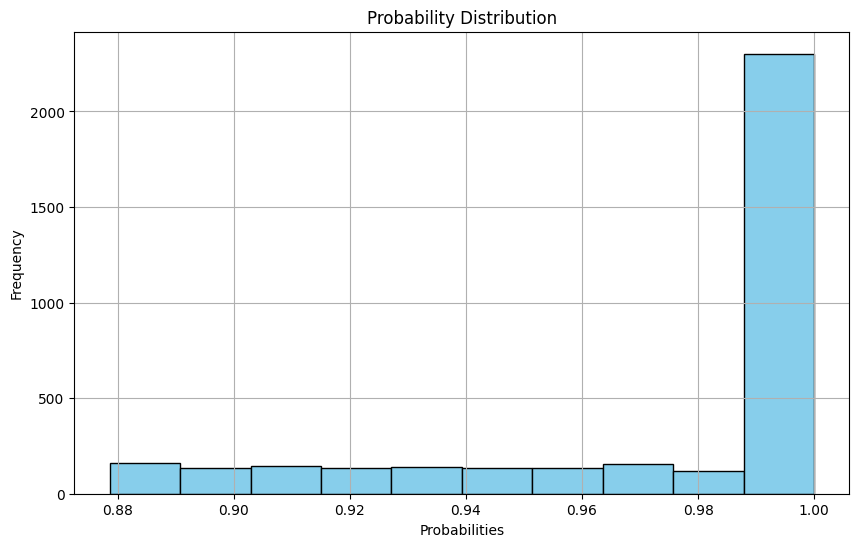

In [6]:
import matplotlib.pyplot as plt

# Plot the 'Probabilities' column
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.hist(aba_posts['Probability'], bins=10, color='skyblue', edgecolor='black')
plt.title('Probability Distribution')
plt.xlabel('Probabilities')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# all the posts found by bertopic seem to be relevant to aba , most have 100% probability to belong to this topic

In [7]:
# we only need the text / document column 
# drop the other columns
aba_posts = aba_posts[['Document']]
aba_posts.info()
aba_posts.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Document  3560 non-null   object
dtypes: object(1)
memory usage: 27.9+ KB


,Document
0,As an autistic person please listen to us when...
1,My daughter who has down syndrome and autism d...
2,One bit of word from an autistic adult Stop AB...


### Which subreddits do the posts come form ?

In [8]:
# as i have not saved the index of the dataset when fitting the model i will need to use datasest resaved after the labeling
# i will leave the original dataset untouched as the labeling was done already and if the dataset is changed the random seed gives different results that don't match the labeled data
file_path = '/Users/andreeanistor/Google Drive/My Drive/MS_DS_NLP_project/bertopics_reddit_aba_posts_indexed.csv'
aba_posts_indexed = pd.read_csv(file_path)
aba_posts_indexed.info() # no missing data, documents text has been cleaned previously

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3560 non-null   int64  
 1   Document                 3560 non-null   object 
 2   Topic                    3560 non-null   int64  
 3   Name                     3560 non-null   object 
 4   Representation           3560 non-null   object 
 5   Representative_Docs      0 non-null      float64
 6   Top_n_words              3560 non-null   object 
 7   Representative_document  3560 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 198.3+ KB


In [9]:
aba_posts_indexed = aba_posts_indexed.rename(columns={'Unnamed: 0': 'original_index'})
aba_posts_indexed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   original_index           3560 non-null   int64  
 1   Document                 3560 non-null   object 
 2   Topic                    3560 non-null   int64  
 3   Name                     3560 non-null   object 
 4   Representation           3560 non-null   object 
 5   Representative_Docs      0 non-null      float64
 6   Top_n_words              3560 non-null   object 
 7   Representative_document  3560 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 198.3+ KB


In [10]:
# take the original index and add it to the aba_poasts dataframe
aba_posts_indexed = aba_posts_indexed[['original_index', 'Document']]
aba_posts_indexed.head(3)

,original_index,Document
0,108,As an autistic person please listen to us when...
1,114,My daughter who has down syndrome and autism d...
2,117,One bit of word from an autistic adult Stop AB...


In [11]:
aba_posts_indexed = pd.merge(aba_posts_indexed, aba_posts, on='Document', how='inner')
aba_posts_indexed.head(3)

,original_index,Document
0,108,As an autistic person please listen to us when...
1,114,My daughter who has down syndrome and autism d...
2,117,One bit of word from an autistic adult Stop AB...


In [12]:
# get the original data set
data_path = '/Users/andreeanistor/Google Drive/My Drive/MS_DS_NLP_project/english_posts_cleaned.csv'
posts_data = pd.read_csv(data_path)
posts_data.head(3)

,id,main_submission_id,comment_parent_id,subreddit,post_type,text,datetime,month,year,text_length,language,language_ft
0,is4ft9s,y2q46p,t3_y2q46p,autism,comment,I don t think it works like that,2022-10-13 05:58:56,10,2022,32,en,en
1,is4gwqj,y2q46p,t3_y2q46p,autism,comment,I do we have handicap add on to our government...,2022-10-13 06:12:48,10,2022,189,en,en
2,is4c22w,y2q46p,t3_y2q46p,autism,comment,Hey u Starflarity thank you for your post at r...,2022-10-13 05:14:14,10,2022,458,en,en


In [13]:
aba_posts_indexed = posts_data[posts_data.index.isin(aba_posts_indexed['original_index'])]
aba_posts_indexed.head(3)

,id,main_submission_id,comment_parent_id,subreddit,post_type,text,datetime,month,year,text_length,language,language_ft
108,isctbxz,y48270,t3_y48270,Parenting,comment,As an autistic person please listen to us when...,2022-10-14 23:49:51,10,2022,711,en,en
114,isduv7z,y48270,t3_y48270,Parenting,comment,My daughter who has down syndrome and autism d...,2022-10-15 05:28:18,10,2022,485,en,en
117,isei0sd,y48270,t3_y48270,Parenting,comment,One bit of word from an autistic adult Stop AB...,2022-10-15 10:52:37,10,2022,300,en,en


In [14]:
aba_posts_indexed.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 3560 entries, 108 to 522360
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  3560 non-null   object
 1   main_submission_id  3560 non-null   object
 2   comment_parent_id   3560 non-null   object
 3   subreddit           3560 non-null   object
 4   post_type           3560 non-null   object
 5   text                3560 non-null   object
 6   datetime            3560 non-null   object
 7   month               3560 non-null   int64 
 8   year                3560 non-null   int64 
 9   text_length         3560 non-null   int64 
 10  language            3560 non-null   object
 11  language_ft         3560 non-null   object
dtypes: int64(3), object(9)
memory usage: 361.6+ KB


In [15]:
subreddit_counts = aba_posts_indexed['subreddit'].value_counts()
subreddit_counts  # the posts come from 185 subreddits

subreddit
ABA                    1201
Autism_Parenting        538
slp                     229
autism                  164
bcba                    118
                       ... 
Bahrain                   1
CapitolConsequences       1
Buffalo                   1
hockey                    1
askportland               1
Name: count, Length: 185, dtype: int64

Number of categories with more than 50 entries: 11


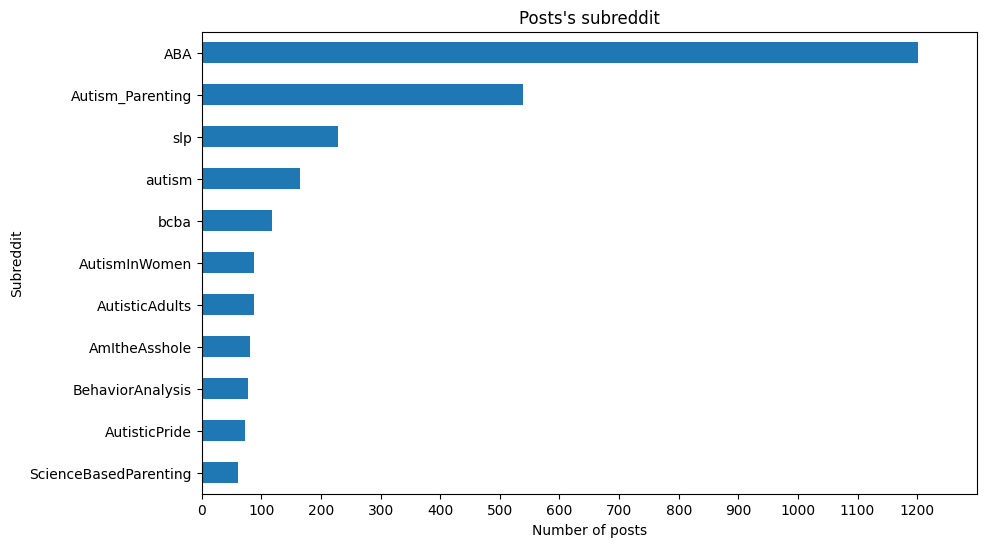

In [16]:
# Plot the 'subreddit' column
# filter for categories with more than 50 entries
filtered_subreddit_counts= subreddit_counts[subreddit_counts > 50]
print('Number of categories with more than 50 entries:', len(filtered_subreddit_counts))

# plot the links type only for the categories with more than 10 entries
plt.figure(figsize=(10, 6))
filtered_subreddit_counts.plot(kind='barh').set_xlim(0, 1300)

plt.xlabel('Number of posts')
plt.ylabel('Subreddit')
plt.title('Posts\'s subreddit')
plt.gca().invert_yaxis()
plt.xticks(range(0, filtered_subreddit_counts.max() + 1, 100))
plt.show()


# most posts come from r/ABA, r/Autism_Parenting, r/slp, and r/autism

### Most common type of post

In [17]:
# 275 original posts 
# 3285 comments 
# most posts are comments
aba_posts_indexed.post_type.value_counts()

post_type
comment       3285
submission     275
Name: count, dtype: int64

### Posts descriptive statistics

In [18]:
# descriptive statistics for numerical values
aba_posts_indexed.describe()

,month,year,text_length
count,3560.000000,3560.000000,3560.000000
mean,6.497753,2022.858146,552.264045
std,3.261480,0.348949,751.808221
min,1.000000,2022.000000,31.000000
25%,4.000000,2023.000000,168.000000
50%,7.000000,2023.000000,356.000000
75%,9.000000,2023.000000,670.250000
max,12.000000,2023.000000,24053.000000


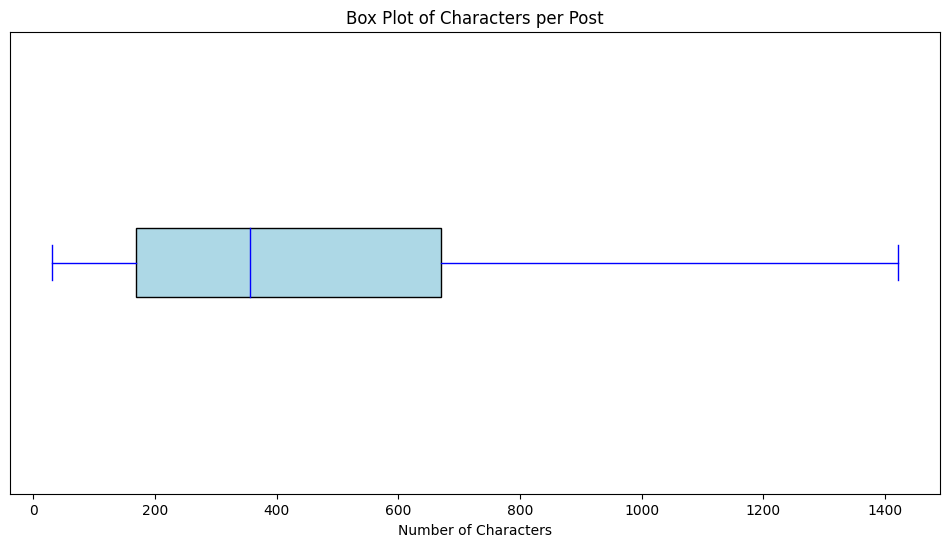

In [19]:
# Create a box plot for the 'text_length' column
plt.figure(figsize=(12, 6))
# dont show the outliers on the box plot
# all post with over 1400 characters is considered an outlier
plt.boxplot(aba_posts_indexed['text_length'], vert=False,  showfliers=False, patch_artist=True,
            boxprops=dict(facecolor="lightblue"), capprops=dict(color="blue"),
            medianprops=dict(color="blue"), whiskerprops=dict(color="blue"))
plt.title("Box Plot of Characters per Post")
plt.xlabel("Number of Characters")
plt.yticks([])  

plt.show()

# most post are short  - half are less than 356 characters long and 3/4 are less than 670 characters

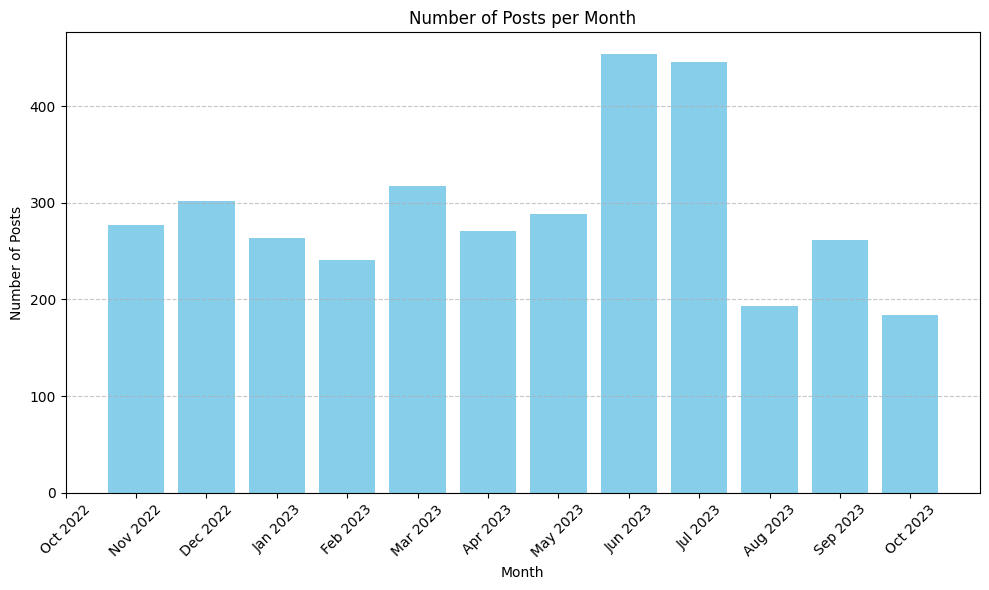

In [20]:
# when were the posts made?
import calendar 

# sort data first by year (in ascending order) and then by month (in ascending order)
aba_posts_indexed = aba_posts_indexed.sort_values(['year', 'month'])
# group the data by 'year' and 'month' and count the number of 'id' values per month
counts = aba_posts_indexed.groupby(['year', 'month'])['id'].count().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(counts['month'], counts['id'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.title('Number of Posts per Month')

# format the x-axis labels to display both month and year
x_labels = [f'{calendar.month_abbr[month]} {year}' for year, month in zip(counts['year'], counts['month'])]

# get the unique x_labels and their corresponding positions ( chronological order )
unique_x_labels = list(set(x_labels))
unique_x_positions = [x_labels.index(label) for label in unique_x_labels]

plt.xticks(unique_x_positions, unique_x_labels, rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# posts seem to be equaly distiributed across the year ( wiht june and july have a slight increase in posting - this is consistent with the whole data set)

# Sentiment analysis
- Supervised NLP task --> we need labeled data

- Like topic modeling there are 2 main approaches:<br><br>
        1. Traditional machine learning (preprocess data, then apply classical classification algrith like random forest, svm, logistic regression etc.)<br><br>
        2. Deep learning ( no preprocessing neccesary; raw data is fed into a transformer model, in NLP ususaly these come pretrained and are fine tuned to the speciffic dataset; this method has shown good performance even when using small datasets - Hartmann et al., 2023)<br>


We need to have a dataset of labeled data -> 500 posts will be selected at random from the aba data set and manually labeled by the author. Sentiment analysis models will be train / fine tuned using this small data set and the best model will be used to clasify all the posts.


<small>Hartmann, J., Heitmann, M., Siebert, C., & Schamp, C. (2023). More than a Feeling: Accuracy and Application of Sentiment Analysis. International Journal of Research in Marketing, 40, 75–87.</small>

In [21]:
# the dataset
aba_posts.info()
aba_posts.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Document  3560 non-null   object
dtypes: object(1)
memory usage: 27.9+ KB


,Document
0,As an autistic person please listen to us when...
1,My daughter who has down syndrome and autism d...
2,One bit of word from an autistic adult Stop AB...


In [22]:
# select the data to be labeled - 500 row at random
aba_posts_to_label = aba_posts.sample(n=500, random_state=7) 
aba_posts_to_label.info()
aba_posts_to_label.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 2626 to 3029
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Document  500 non-null    object
dtypes: object(1)
memory usage: 7.8+ KB


,Document
2626,Is she in ABA therapy I only ask because my hu...
858,I heard you are able to ask them questions May...
3210,I agree with that Even dr Lovaas said ABA does...


In [23]:
# save posts to be labeled in a csv file
file_path = 'data/aba_posts_labeled.csv'
aba_posts_to_label.to_csv(file_path, index=False)

In [24]:
# labeled by Elvira Lago - Registered Behavioural Technician (RBT)
for_elvie = aba_posts_to_label.head(160)
for_elvie.info()
file_path = 'data/labeled_data/for_elvie.csv'
for_elvie.to_csv(file_path, index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 2626 to 889
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Document  160 non-null    object
dtypes: object(1)
memory usage: 2.5+ KB


In [25]:
for_elvie2 = aba_posts_to_label.iloc[160:360]
for_elvie2.info()
file_path = 'data/labeled_data/for_elvie2.csv'
for_elvie2.to_csv(file_path, index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1805 to 180
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Document  200 non-null    object
dtypes: object(1)
memory usage: 3.1+ KB


In [26]:
for_elvie3 = aba_posts_to_label.iloc[360:]
for_elvie3.info()
file_path = 'data/labeled_data/for_elvie3.csv'
for_elvie3.to_csv(file_path, index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 1799 to 3029
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Document  140 non-null    object
dtypes: object(1)
memory usage: 2.2+ KB


In [27]:
# get more posts to lablel as Elvie is very fast :) ( this will give 1000 posts to train the model)
# might actually be abel to label all the posts ??? - started this but not finished
rows_not_in_aba_posts_to_label = aba_posts[~aba_posts.index.isin(aba_posts_to_label.index)]
rows_not_in_aba_posts_to_label.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3060 entries, 0 to 3559
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Document  3060 non-null   object
dtypes: object(1)
memory usage: 47.8+ KB


In [28]:
# get 500 more random rows to labels
for_elvie4 = rows_not_in_aba_posts_to_label.sample(n=500, random_state=7) 
for_elvie4.info()
for_elvie4.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 781 to 3557
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Document  500 non-null    object
dtypes: object(1)
memory usage: 7.8+ KB


,Document
781,The anti ABA camp I usually see would absolute...
2394,ABA is not the treatment you think it is Do so...
426,ABA is not necessarily awful if done with resp...


In [29]:
file_path = 'data/labeled_data/for_elvie4.csv'
for_elvie4.to_csv(file_path, index=False)

In [30]:
# get the rest of the rows that have not yet been labeled / sent to elvie
# 2560 rows ( elvie labeles 1000 )
rows_still_tobe_labeled = rows_not_in_aba_posts_to_label[~rows_not_in_aba_posts_to_label.index.isin(for_elvie4.index)]
rows_still_tobe_labeled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2560 entries, 1 to 3559
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Document  2560 non-null   object
dtypes: object(1)
memory usage: 40.0+ KB


In [31]:
# get the first 1000 rows
for_andrea = rows_still_tobe_labeled.head(1000) # i will label 1000 of them 
for_andrea.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1383
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Document  1000 non-null   object
dtypes: object(1)
memory usage: 15.6+ KB


In [32]:
# save the dataset
file_path = 'data/labeled_data/for_andrea.csv'
for_andrea.to_csv(file_path, index=False)

In [33]:
for_maria = df_next_1000 = rows_still_tobe_labeled.iloc[1000:2000]
for_maria.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1385 to 2775
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Document  1000 non-null   object
dtypes: object(1)
memory usage: 15.6+ KB


In [34]:
# save the dataset
file_path = 'data/labeled_data/for_maria.csv'
for_maria.to_csv(file_path, index=False)

In [35]:
for_elvie5 = rows_still_tobe_labeled.iloc[2000:]
# save the dataset
file_path = 'data/labeled_data/for_elvie5.csv'
for_elvie5.to_csv(file_path, index=False)

for_elvie5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 560 entries, 2777 to 3559
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Document  560 non-null    object
dtypes: object(1)
memory usage: 8.8+ KB


## Labeled data 
Data cleaning and preliminiary analysis

In [36]:
# import labeled data ( random 1000 posts lebeled by Elvie and  - 100 double checked by me )
aba_posts_labeled1 = pd.read_csv('data/labeled_data/for_elvie_labeled.csv')
aba_posts_labeled1.info()
print()

aba_posts_labeled2 = pd.read_csv('data/labeled_data/for_elvie2_labeled.csv')
aba_posts_labeled2.info()
print()

aba_posts_labeled3 = pd.read_csv('data/labeled_data/for_elvie3_labeled.csv')
aba_posts_labeled3.info()
print()

aba_posts_labeled4 = pd.read_csv('data/labeled_data/for_elvie4_labeled.csv')
aba_posts_labeled4.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 4 columns):
 #   Column                                                                                             Non-Null Count  Dtype 
---  ------                                                                                             --------------  ----- 
 0   Document                                                                                           160 non-null    object
 1   Sentiment (poz / neg/ neutral)                                                                     160 non-null    object
 2   Author (can be parent/carer/professions/person with ASD) leave blank if it is not clearly stated)  85 non-null     object
 3   Comments - anything you deem important info                                                        34 non-null     object
dtypes: object(4)
memory usage: 5.1+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4

In [37]:
# join the labeled data ( 1000 random posts )
aba_posts_labeled = pd.concat([aba_posts_labeled1, aba_posts_labeled2, aba_posts_labeled3, aba_posts_labeled4], ignore_index=True)
aba_posts_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                                                                                             Non-Null Count  Dtype 
---  ------                                                                                             --------------  ----- 
 0   Document                                                                                           1000 non-null   object
 1   Sentiment (poz / neg/ neutral)                                                                     982 non-null    object
 2   Author (can be parent/carer/professions/person with ASD) leave blank if it is not clearly stated)  386 non-null    object
 3   Comments - anything you deem important info                                                        284 non-null    object
dtypes: object(4)
memory usage: 31.4+ KB


In [38]:
# Rename columns as needed
column_mapping = {
    'Sentiment (poz / neg/ neutral)': 'sentiment',
    'Author (can be parent/carer/professions/person with ASD) leave blank if it is not clearly stated)': 'author',
    'Comments - anything you deem important info': 'commnents'
}

aba_posts_labeled.rename(columns=column_mapping, inplace=True)
aba_posts_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Document   1000 non-null   object
 1   sentiment  982 non-null    object
 2   author     386 non-null    object
 3   commnents  284 non-null    object
dtypes: object(4)
memory usage: 31.4+ KB


In [39]:
# get 10% random entries to code myself as well for interobserver agreement
ioa_df = random_rows = aba_posts_labeled.sample(n=100)
# save the ioa df 
ioa_df.to_csv('data/labeled_data/inter_observer_agreement/ioa.csv', index=False)


In [40]:
aba_posts_labeled.head()

,Document,sentiment,author,commnents
0,Is she in ABA therapy I only ask because my hu...,Neutral,NaN,NaN
1,I heard you are able to ask them questions May...,Neutral,NaN,
2,I agree with that Even dr Lovaas said ABA does...,Pozitive,NaN,
3,Thank you so so much for sharing your experien...,Pozitive,Parent,
4,Thank you that makes a lot of sense Seems pret...,Neutral,NaN,NaN


In [41]:
# 18 entries sentiment col missing
# sentiment was not recorded as the posts were not relevant to aba - see comments
# remove these rows
# the bertopic model resulted in almost all posts being relevant to aba - only 1 out of 1000 posts are not aba related (1.8%)
aba_posts_labeled[aba_posts_labeled['sentiment'].isnull()]


,Document,sentiment,author,commnents
232,Sounds like this SLP is using outdated practic...,NaN,NaN,Not aba
288,Speech therapist here like many are saying I t...,NaN,NaN,Not aba
365,BT Survey Updates on Burnout and Satisfaction ...,NaN,ABA professional,Survey about professionals suffering burnout
416,If you're not an SLP you're not qualified to e...,NaN,NaN,Not ABA
421,I work with SLPS at my clinic because we are m...,NaN,NaN,Not ABA
467,This is a hard one I had to learn this alone G...,NaN,NaN,Not ABA
499,A tragic case with a mentally ill mother Using...,NaN,NaN,Not ABA
526,Are you implying that SLPs don't have the know...,NaN,NaN,Not ABA
573,Ah yes aans wres otherwise known as awarness,NaN,NaN,Not ABA
580,To become a licensed SLP you would need to com...,NaN,NaN,Not ABA


In [42]:
# the post is an invitation for aba professionals to complete a survey on burnout 
# not sentiment relevant ( at best neutral ) -> will be dropped
aba_posts_labeled.Document[365]

"BT Survey Updates on Burnout and Satisfaction Hi I shared my supervisor's survey a couple of weeks ago and they have hit the mark Thank you Please fill out to share your opinion on burnout and satisfaction with the BT job if you haven't yet The more responses the better BT voices could truly be heard once published Click here for the BT Survey https forms office com Pages Response Page aspx id DQSIk Wds W yx Ejaj BLZtr QAAAAAAAAAAAAN j Ln ZNUMk ENE DR cx M BSk Qx Nl BUSj Q TU TOS u More info about the study Who Behavior Technicians Registered Behavior Technicians ABA paraprofessionals What IRB approved study using an anonymous min survey on BT's experiences with burnout company fairness and satisfaction with their job Why Researchers would like to learn about BT attitudes and experiences in the ABA industry and what companies can do to best support them Where Click here for the BT Survey https forms office com Pages Response Page aspx id DQSIk Wds W yx Ejaj BLZtr QAAAAAAAAAAAAN j Ln Z

In [43]:
aba_posts_labeled = aba_posts_labeled.dropna(subset=['sentiment'])
aba_posts_labeled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Document   982 non-null    object
 1   sentiment  982 non-null    object
 2   author     385 non-null    object
 3   commnents  266 non-null    object
dtypes: object(4)
memory usage: 38.4+ KB


In [44]:
# as per instruction given for labling atuhor entry was left blank if the author was not clear in the post
# replace the NaN values in authot with 'layperson' 
aba_posts_labeled['author'].fillna('layperson', inplace=True)
aba_posts_labeled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Document   982 non-null    object
 1   sentiment  982 non-null    object
 2   author     982 non-null    object
 3   commnents  266 non-null    object
dtypes: object(4)
memory usage: 38.4+ KB


In [45]:
# look at sentiment classes 
# there are some misspelling -> can be corrected
# sentiment is blank space in 4 rows
aba_posts_labeled['sentiment'].value_counts()

sentiment
Neutral              617
Negative             221
Positive             124
                       4
Positive               4
Pozitive               3
Neutral                3
Neutral?               2
Negative?              1
Pozitive Negative      1
Negative               1
Ne                     1
Name: count, dtype: int64

In [46]:
empty_sentiment_rows = aba_posts_labeled[aba_posts_labeled['sentiment'].str.isspace()] 
empty_sentiment_rows  # posts not about aba -> drop them
# altogether 18 + 4 = 22 posts out of 1000 were not aba related ( ~ 2%) -> bertopic identified mosty relevant topics

,Document,sentiment,author,commnents
11,Abata Therapeutics Announces First Development...,,layperson,Not aba related
117,OT is amazing We have done speech and OT since...,,Parent,Not aba related
160,I honestly don't know how Aba disagreed with P...,,layperson,Aba N Preach - YouTube channel not relevant
184,Don't do SLPA It's extremely hard to find jobs...,,layperson,Not aba


In [47]:
aba_posts_labeled.drop(empty_sentiment_rows.index, inplace=True)
aba_posts_labeled.info()
# 978 posts to be inlcuded in the analysis 
# comments columns has missing data - however this col. is only for reference and will be dropped for final analysis

<class 'pandas.core.frame.DataFrame'>
Index: 978 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Document   978 non-null    object
 1   sentiment  978 non-null    object
 2   author     978 non-null    object
 3   commnents  262 non-null    object
dtypes: object(4)
memory usage: 38.2+ KB


In [48]:
# check rows where sentiment contains a ? ( grader was unsure )
question_mark_rows = aba_posts_labeled[aba_posts_labeled['sentiment'].str.contains('\?', na=False, regex=True)]
question_mark_rows

,Document,sentiment,author,commnents
103,This makes a lot of sense Thanks for giving su...,Negative?,ABA professional,Not sure if ABA is right to treat children wit...
147,Accommodating is one thing Installing a ramp f...,Neutral?,Parent,NaN
960,No I m saying he d be pissed about modern ABA ...,Neutral?,layperson,NaN


In [49]:
# if the coders were confused the ML algo. might be as well 
# drop rows where sentiment contains '?'
aba_posts_labeled = aba_posts_labeled[~aba_posts_labeled['sentiment'].str.contains('\?')]
aba_posts_labeled.info()

# 975 rows / posts remain

<class 'pandas.core.frame.DataFrame'>
Index: 975 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Document   975 non-null    object
 1   sentiment  975 non-null    object
 2   author     975 non-null    object
 3   commnents  261 non-null    object
dtypes: object(4)
memory usage: 38.1+ KB


### Sentiment 
Descriptive statistics

In [50]:
aba_posts_labeled['sentiment'].value_counts()  # category labeles need cleaning ( spelling checks and consistency )

sentiment
Neutral              617
Negative             221
Positive             124
Positive               4
Pozitive               3
Neutral                3
Pozitive Negative      1
Negative               1
Ne                     1
Name: count, dtype: int64

In [51]:
# show row with sentiment 'Ne'
rows_with_sentiment_ne = aba_posts_labeled[aba_posts_labeled['sentiment'] == 'Ne']
rows_with_sentiment_ne

,Document,sentiment,author,commnents
417,No personally as a RBT i would never suggest a...,Ne,ABA professional,NaN


In [52]:
aba_posts_labeled.Document[417]

'No personally as a RBT i would never suggest anything like this'

In [53]:
# not really aba sentiment related => drop it 
aba_posts_labeled = aba_posts_labeled[aba_posts_labeled['sentiment'] != 'Ne']
aba_posts_labeled.info()


<class 'pandas.core.frame.DataFrame'>
Index: 974 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Document   974 non-null    object
 1   sentiment  974 non-null    object
 2   author     974 non-null    object
 3   commnents  261 non-null    object
dtypes: object(4)
memory usage: 38.0+ KB


In [54]:
# look at the entry (Pozitive Negative) for semntiment
aba_posts_labeled[aba_posts_labeled['sentiment'] == 'Pozitive Negative']

,Document,sentiment,author,commnents
161,I also can t bring myself to take my son to ab...,Pozitive Negative,Parent,


In [55]:
print(aba_posts_labeled.Document[161])  # contains both positive and negative things -> flag as neutral
# Replace 'Pozitive Negative' with 'Neutral' in the 'sentiment' column
aba_posts_labeled['sentiment'] = aba_posts_labeled['sentiment'].replace('Pozitive Negative', 'Neutral')

aba_posts_labeled.info()

I also can t bring myself to take my son to aba Every place I ve seen around here is shit There are some people who ve found amazing aba therapists so I guess it s worth looking into but I d never dump my son at a subpar place and there are many subpar places It s hard as it s the only thing covered by insurance and recommended by drs
<class 'pandas.core.frame.DataFrame'>
Index: 974 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Document   974 non-null    object
 1   sentiment  974 non-null    object
 2   author     974 non-null    object
 3   commnents  261 non-null    object
dtypes: object(4)
memory usage: 70.3+ KB


In [56]:
# remove whitespace 
aba_posts_labeled['sentiment'] = aba_posts_labeled['sentiment'].str.strip()
aba_posts_labeled['sentiment'].value_counts() 

sentiment
Neutral     621
Negative    222
Positive    128
Pozitive      3
Name: count, dtype: int64

In [57]:
# make spelling uniform for pozitive sentiment label 
mask = aba_posts_labeled['sentiment'].str.startswith('Po')
aba_posts_labeled.loc[mask, 'sentiment'] = 'Pozitive'
aba_posts_labeled['sentiment'].value_counts() 

sentiment
Neutral     621
Negative    222
Pozitive    131
Name: count, dtype: int64

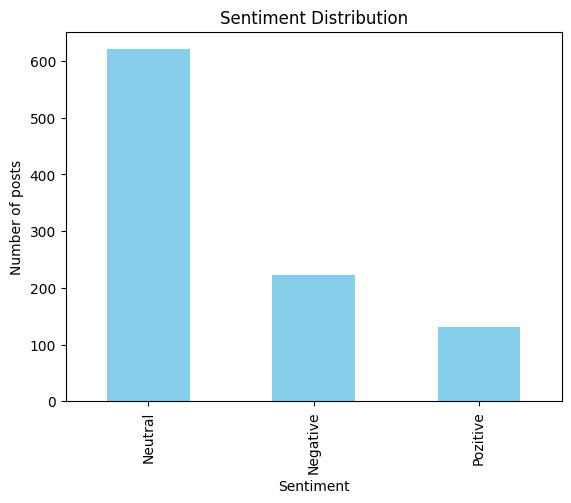

In [58]:
# Plot the 'sentiment' column
sentiment_counts = aba_posts_labeled['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of posts')
plt.show()

# more than half the posts present as neutral regarding aba therapy 
# data is not balanced

# as per instructions and also by inspecting the comments column :
# posts that are neutral are either:
#   - information/advice seeking about aba therapy related
#   - information/advice seeking about aba job related
#   - information/advice seeking about aba in general
#   - people expressing both pozitive and negative opinions about aba in the same post 

# negative sentiments were recorded for those posts that:
#   - expressed only opinions against aba therapy aor aba in general
#   - expressed only opinions against aba as a career field/ job related 

# pozitive sentiments were recorded for those posts that:
#   - expressed only pozitive opinions about aba therapy or aba in general
#   - expressed only pozitive opinions about aba as a career field/ job related 

### Post's Author 
Descriptive statistics

In [59]:
# look at categories of authors
# strip white spaces
aba_posts_labeled['author'] = aba_posts_labeled['author'].str.strip()
# lowewrcase all lables
aba_posts_labeled['author'] = aba_posts_labeled['author'].str.lower()
aba_posts_labeled['author'].value_counts() 

author
layperson                                    593
aba professional                             196
parent                                        78
asd person                                    27
professional                                  13
aba professional with asd                     10
aba professional?                              6
slp                                            5
ex aba profesisonal                            4
ex aba professional                            4
asd person?                                    2
relative                                       2
student                                        2
family                                         2
professional?                                  2
ex - aba professional                          2
asd parent                                     2
professors                                     1
sibling                                        1
psychologist with asd                          1
education pro

In [60]:
# replace ? containing labels with layperson ( as the grader was not sure , it means it is not clear in the text)
question_mark_rows = aba_posts_labeled[aba_posts_labeled['author'].str.contains('\?', na=False, regex=True)]
aba_posts_labeled.loc[question_mark_rows.index, 'author'] = 'layperson'
aba_posts_labeled['author'].value_counts()

author
layperson                                    605
aba professional                             196
parent                                        78
asd person                                    27
professional                                  13
aba professional with asd                     10
slp                                            5
ex aba professional                            4
ex aba profesisonal                            4
family                                         2
asd parent                                     2
ex - aba professional                          2
student                                        2
relative                                       2
ot                                             1
teacher                                        1
asd student                                    1
social worker with asd                         1
aba student                                    1
parent with asd                                1
clinical ther

In [61]:
# replace other people with layperson 
other_people = ['relativeo of aba professional', 'student', 'aba student', 'person with “special needs” not specified']

other_people_mapping = {person: 'layperson' for person in other_people}
aba_posts_labeled['author'] = aba_posts_labeled['author'].replace(other_people_mapping)

aba_posts_labeled.author.value_counts()


author
layperson                      610
aba professional               196
parent                          78
asd person                      27
professional                    13
aba professional with asd       10
slp                              5
ex aba profesisonal              4
ex aba professional              4
asd parent                       2
family                           2
relative                         2
ex - aba professional            2
professors                       1
parent with asd child            1
parent with asd                  1
asd student                      1
teacher                          1
psychologist with asd            1
social worker with asd           1
clinical therapist with asd      1
sibling                          1
ot                               1
psychologist                     1
friend of asd person             1
ot with asd                      1
education professional           1
ex aba professional / ot         1
occupational 

In [62]:
# replace other therapy/education related professions with other_professions
other_professions = ['slp', 'ot', 'salt', 'psychologist', 'teacher', 'education professional', 'professors', 'occupational therapist', 'professional', 'ex aba professional / ot']

profession_mapping = {profession: 'other_professional' for profession in other_professions}

aba_posts_labeled['author'] = aba_posts_labeled['author'].replace(profession_mapping)

aba_posts_labeled.author.value_counts()

author
layperson                      610
aba professional               196
parent                          78
asd person                      27
other_professional              26
aba professional with asd       10
ex aba profesisonal              4
ex aba professional              4
asd parent                       2
family                           2
ex - aba professional            2
relative                         2
asd teacher                      1
ot/parent                        1
ot with asd                      1
friend of asd person             1
parent with asd child            1
sibling                          1
clinical therapist with asd      1
social worker with asd           1
psychologist with asd            1
asd student                      1
parent with asd                  1
Name: count, dtype: int64

In [63]:
# replace other therapy/education related professions with other_professions
family = ['sibling', 'friend of asd person', 'relative']

family_mapping = {member: 'family' for member in family}

aba_posts_labeled['author'] = aba_posts_labeled['author'].replace(family_mapping)

aba_posts_labeled.author.value_counts()

author
layperson                      610
aba professional               196
parent                          78
asd person                      27
other_professional              26
aba professional with asd       10
family                           6
ex aba profesisonal              4
ex aba professional              4
ex - aba professional            2
asd parent                       2
clinical therapist with asd      1
asd student                      1
social worker with asd           1
asd teacher                      1
parent with asd child            1
ot with asd                      1
ot/parent                        1
psychologist with asd            1
parent with asd                  1
Name: count, dtype: int64

In [64]:
# standardize labels for ex aba professional
ex_aba_professional = ['ex aba professional', 'ex - aba professional']

ex_aba_mapping = {member: 'ex aba profesisonal' for member in ex_aba_professional}

aba_posts_labeled['author'] = aba_posts_labeled['author'].replace(ex_aba_mapping)

aba_posts_labeled.author.value_counts()


author
layperson                      610
aba professional               196
parent                          78
asd person                      27
other_professional              26
ex aba profesisonal             10
aba professional with asd       10
family                           6
asd parent                       2
ot/parent                        1
asd teacher                      1
psychologist with asd            1
ot with asd                      1
parent with asd child            1
clinical therapist with asd      1
social worker with asd           1
asd student                      1
parent with asd                  1
Name: count, dtype: int64

In [65]:
# standardize labels for person with “special needs” not specified ( = layperson) and parent
aba_posts_labeled['author'] = aba_posts_labeled['author'].replace('asd student', 'asd person')
aba_posts_labeled['author'] = aba_posts_labeled['author'].replace('parent with asd child', 'parent')

aba_posts_labeled.author.value_counts()

author
layperson                      610
aba professional               196
parent                          79
asd person                      28
other_professional              26
ex aba profesisonal             10
aba professional with asd       10
family                           6
asd parent                       2
psychologist with asd            1
ot/parent                        1
asd teacher                      1
ot with asd                      1
clinical therapist with asd      1
social worker with asd           1
parent with asd                  1
Name: count, dtype: int64

In [66]:
# replace other therapy/education related professions with other_professions in strings
other_professions = [ 'ot', 'psychologist', 'teacher', 'social worker', 'clinical therapist']
profession_mapping = {profession: 'other_professional' for profession in other_professions}

aba_posts_labeled['author'] = aba_posts_labeled['author'].replace(profession_mapping, regex=True)

aba_posts_labeled.author.value_counts()

author
layperson                             610
aba professional                      196
parent                                 79
asd person                             28
other_professionalher_professional     26
ex aba profesisonal                    10
aba professional with asd              10
family                                  6
other_professional with asd             4
asd parent                              2
other_professional/parent               1
asd other_professional                  1
parent with asd                         1
Name: count, dtype: int64

In [67]:
aba_posts_labeled['author'] = aba_posts_labeled['author'].replace('other_professionalher_professional', 'other_professional')
aba_posts_labeled.author.value_counts()


author
layperson                      610
aba professional               196
parent                          79
asd person                      28
other_professional              26
ex aba profesisonal             10
aba professional with asd       10
family                           6
other_professional with asd      4
asd parent                       2
other_professional/parent        1
asd other_professional           1
parent with asd                  1
Name: count, dtype: int64

In [68]:
# repalce 'with' with '/'
aba_posts_labeled['author'] = aba_posts_labeled['author'].replace('with', '/', regex=True)
aba_posts_labeled.author.value_counts()

author
layperson                    610
aba professional             196
parent                        79
asd person                    28
other_professional            26
ex aba profesisonal           10
aba professional / asd        10
family                         6
other_professional / asd       4
asd parent                     2
other_professional/parent      1
asd other_professional         1
parent / asd                   1
Name: count, dtype: int64

In [69]:
aba_posts_labeled['author'] = aba_posts_labeled['author'].replace('asd person', 'asd')
aba_posts_labeled['author'] = aba_posts_labeled['author'].replace('asd parent', 'parent / asd')
aba_posts_labeled['author'] = aba_posts_labeled['author'].replace('asd other_professional', 'asd / other_professional')

aba_posts_labeled.author.value_counts()

author
layperson                    610
aba professional             196
parent                        79
asd                           28
other_professional            26
ex aba profesisonal           10
aba professional / asd        10
family                         6
other_professional / asd       4
parent / asd                   3
other_professional/parent      1
asd / other_professional       1
Name: count, dtype: int64

After consulting with Francesca degli Espinosa PhD, BCBA-D:<br>
-> family put them in layperson as they are not caregivers, and not involved in the decission process<br>
-> ex aba professionals - put them in other_prefessions and just keep curent ones as aba professions

In [70]:
# family - > move to layperson as they are not directly involved in decission making regarding the therapy
aba_posts_labeled['author'] = aba_posts_labeled['author'].replace('family', 'layperson')
# ex aba proffessionals go into other_professionals as they are not currently practicing aba
aba_posts_labeled['author'] = aba_posts_labeled['author'].replace('ex aba profesisonal', 'other_professional')

aba_posts_labeled.author.value_counts()

author
layperson                    616
aba professional             196
parent                        79
other_professional            36
asd                           28
aba professional / asd        10
other_professional / asd       4
parent / asd                   3
other_professional/parent      1
asd / other_professional       1
Name: count, dtype: int64

In [71]:
# split the 'author' column and convert to lists
aba_posts_labeled['author'] = aba_posts_labeled['author'].str.split('/')
# strip white spaces from each element within the 'author' column
aba_posts_labeled['author'] = aba_posts_labeled['author'].apply(lambda x: [i.strip() for i in x])
aba_posts_labeled.author.value_counts()

author
[layperson]                     616
[aba professional]              196
[parent]                         79
[other_professional]             36
[asd]                            28
[aba professional, asd]          10
[other_professional, asd]         4
[parent, asd]                     3
[other_professional, parent]      1
[asd, other_professional]         1
Name: count, dtype: int64

In [72]:
# some list have the same entries but reversed orther -> make it uniform
aba_posts_labeled['author'] = aba_posts_labeled['author'].apply(set)
aba_posts_labeled['author'] = aba_posts_labeled['author'].apply(list)
aba_posts_labeled.author.value_counts()

author
[layperson]                     616
[aba professional]              196
[parent]                         79
[other_professional]             36
[asd]                            28
[aba professional, asd]          10
[asd, other_professional]         5
[parent, asd]                     3
[parent, other_professional]      1
Name: count, dtype: int64

#### Dealing with List Values in Pandas Dataframes
https://medium.com/p/a177e534f173 - source code

In [73]:
aba_posts_labeled.author.sample(10)

185           [layperson]
453           [layperson]
429              [parent]
630    [aba professional]
522    [aba professional]
294           [layperson]
874    [aba professional]
903           [layperson]
864           [layperson]
437           [layperson]
Name: author, dtype: object

In [74]:
aba_posts_labeled.info()  # 974 rows/ post to include in sentiment analisys

<class 'pandas.core.frame.DataFrame'>
Index: 974 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Document   974 non-null    object
 1   sentiment  974 non-null    object
 2   author     974 non-null    object
 3   commnents  261 non-null    object
dtypes: object(4)
memory usage: 70.3+ KB


In [75]:
aba_posts_labeled.sample(3)

,Document,sentiment,author,commnents
793,Aside from going into debt or taking out a HEL...,Neutral,[layperson],NaN
741,Those are definitley fine and what aba should ...,Neutral,[layperson],Opinion
665,I suppose this one varies person to person How...,Neutral,[layperson],Opinion


In [76]:
# because we created the lists with split() they are recognised as list by pandas
for i, l in enumerate(aba_posts_labeled["author"]):
    print("list",i,"is",type(l))

list 0 is <class 'list'>
list 1 is <class 'list'>
list 2 is <class 'list'>
list 3 is <class 'list'>
list 4 is <class 'list'>
list 5 is <class 'list'>
list 6 is <class 'list'>
list 7 is <class 'list'>
list 8 is <class 'list'>
list 9 is <class 'list'>
list 10 is <class 'list'>
list 11 is <class 'list'>
list 12 is <class 'list'>
list 13 is <class 'list'>
list 14 is <class 'list'>
list 15 is <class 'list'>
list 16 is <class 'list'>
list 17 is <class 'list'>
list 18 is <class 'list'>
list 19 is <class 'list'>
list 20 is <class 'list'>
list 21 is <class 'list'>
list 22 is <class 'list'>
list 23 is <class 'list'>
list 24 is <class 'list'>
list 25 is <class 'list'>
list 26 is <class 'list'>
list 27 is <class 'list'>
list 28 is <class 'list'>
list 29 is <class 'list'>
list 30 is <class 'list'>
list 31 is <class 'list'>
list 32 is <class 'list'>
list 33 is <class 'list'>
list 34 is <class 'list'>
list 35 is <class 'list'>
list 36 is <class 'list'>
list 37 is <class 'list'>
list 38 is <class 'lis

In [77]:
# Count all the labels per category
aba_posts_labeled["author"].explode().value_counts()  

author
layperson             616
aba professional      206
parent                 83
asd                    46
other_professional     42
Name: count, dtype: int64

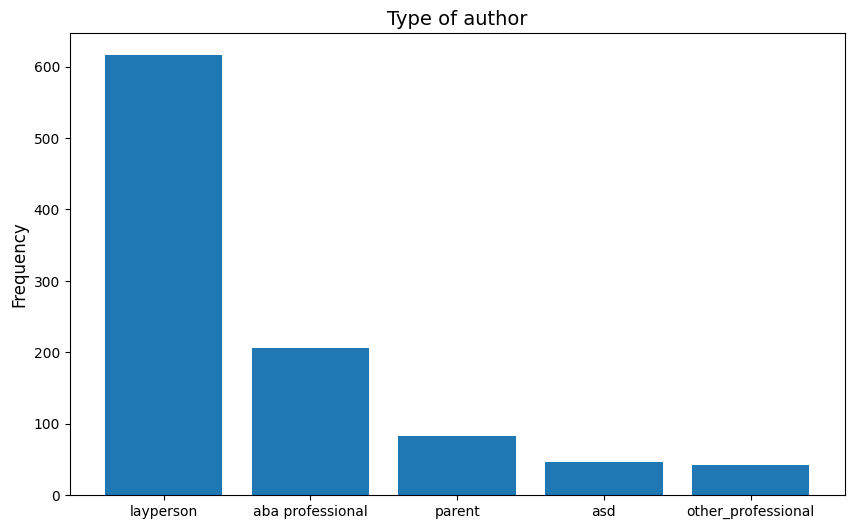

In [78]:
# Get unique items & counts
unique_values = aba_posts_labeled["author"].explode().value_counts().index.tolist()
unique_value_counts = aba_posts_labeled["author"].explode().value_counts().values

# Create plot
fig, ax = plt.subplots(figsize = (10,6))
ax.bar(unique_values, unique_value_counts)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Type of author", size = 14)
plt.show()


# data is not balanced
# more than half the post do not explicitly state they are a professional, a parents/carer or if they have ASD
# more than half the posts come from the general population ( that most likely has not directly experienced ABA, be it as a client or a proveder)

In [79]:
# Create Individual Columns for All Unique Values

def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)


In [80]:
aba_posts_labeled_bool = boolean_df(
  item_lists = aba_posts_labeled["author"],
  unique_items = unique_values
)

In [81]:
aba_posts_labeled_bool.head()

,layperson,aba professional,parent,asd,other_professional
0,True,False,False,False,False
1,True,False,False,False,False
2,True,False,False,False,False
3,False,False,True,False,False
4,True,False,False,False,False


In [82]:
# join 'Document' and 'sentiment' columns from aba_posts_labeled with aba_posts_labeled_bool
aba_posts_labeled_new = pd.concat([aba_posts_labeled[['Document', 'sentiment']], aba_posts_labeled_bool], axis=1)

aba_posts_labeled_new.info()
aba_posts_labeled_new.head()

<class 'pandas.core.frame.DataFrame'>
Index: 974 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Document            974 non-null    object
 1   sentiment           974 non-null    object
 2   layperson           974 non-null    bool  
 3   aba professional    974 non-null    bool  
 4   parent              974 non-null    bool  
 5   asd                 974 non-null    bool  
 6   other_professional  974 non-null    bool  
dtypes: bool(5), object(2)
memory usage: 59.9+ KB


,Document,sentiment,layperson,aba professional,parent,asd,other_professional
0,Is she in ABA therapy I only ask because my hu...,Neutral,True,False,False,False,False
1,I heard you are able to ask them questions May...,Neutral,True,False,False,False,False
2,I agree with that Even dr Lovaas said ABA does...,Pozitive,True,False,False,False,False
3,Thank you so so much for sharing your experien...,Pozitive,False,False,True,False,False
4,Thank you that makes a lot of sense Seems pret...,Neutral,True,False,False,False,False


In [83]:
# save new dataset on google drive - needed to be imported in colab for running transformer models on GPU
aba_posts_labeled_new.to_csv('/Users/andreeanistor/Google Drive/My Drive/MS_DS_NLP_project/aba_posts_labeled_cleaned.csv', index=False)

## Deep learning - SiEBERT
https://huggingface.co/siebert/sentiment-roberta-large-english

code on google colab -> needs bigger GPU than locally available



According to Hartmann et al (2023) transfer learning ( used mostly in  NLP with predtrained LLMs based on transformer architecture) produces generally the best results ( around 80% accuracy when dealing with 3 classes).

Also according to the authors cited above, when fine-tuning SiEBERT on a new three-class sentiment dataset (sentiment140) with as little as 400 training examples, it reaches a classification accuracy of 68:37% after only 1 epoch of training.


<small>Hartmann, J., Heitmann, M., Siebert, C., & Schamp, C. (2023). "More than a Feeling: Accuracy and Application of Sentiment Analysis." International Journal of Research in Marketing, 40, 75–87.</small>

<img src="flowcharts_diagrams/Hartmann et al_2023_decision_diagram.png" alt="text sentiment/clasiffication decission diagram">


## Traditional Machine Learning 
As sentiment analysis is a text classification problem ( in our case 3 classes ) we can use traditional text clasification algorithms like Naive Bayes, SVM or KNN.

Pipeline for NLP:

1. get data -> (use the dataset generated above: /Users/andreeanistor/Google Drive/My Drive/MS_DS_NLP_project/aba_posts_labeled_cleaned.csv)
2. text extraction and cleanup - text cleaned previously (before the topic modeling step)
3. pre-processing: 
    -   3.1 split text into tokens/words (=sentence segmentation/ tokanisation NLTK or Spcy or AutoTokenizer if using transformers) 
    -   3.2 stemming (=remove prefixes and sufixes) and lemmatization (=get the base word - ext ate becomes (to)eat)
4. feature engineering (= convert text / document into vector) count-vector, tf-idf or one-hot encode - not really used due to size and sparcity problems word/token-emebeding
5. apply classifier ( any machine learning model classifier ) - use gridSearchCV to see which is the best performing classifier.
6. evaluate model: Accuracy, Precision, Recall, F1 score ( if not good , go back to preprocessing step ) - > the current project will stop after this step 
7. Deploy (will not be implemented)
8. Monitor and update (will not be implemented)

In [84]:
aba_posts_labeled_cleaned = pd.read_csv('/Users/andreeanistor/Google Drive/My Drive/MS_DS_NLP_project/aba_posts_labeled_cleaned.csv')
aba_posts_labeled_cleaned.info() 

# no missing data 
# # columns to use in sentiment analisys = document (predictors - X) and sentiment(target -y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Document            974 non-null    object
 1   sentiment           974 non-null    object
 2   layperson           974 non-null    bool  
 3   aba professional    974 non-null    bool  
 4   parent              974 non-null    bool  
 5   asd                 974 non-null    bool  
 6   other_professional  974 non-null    bool  
dtypes: bool(5), object(2)
memory usage: 20.1+ KB


In [85]:
# select from the dataset only the text features neccesary for text clasififcation - sentiment analysis
# Features: Document and sentiment 
aba_posts_sentiment = aba_posts_labeled_cleaned[['Document', 'sentiment']]
aba_posts_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Document   974 non-null    object
 1   sentiment  974 non-null    object
dtypes: object(2)
memory usage: 15.3+ KB


In [86]:
aba_posts_sentiment.head(3)

,Document,sentiment
0,Is she in ABA therapy I only ask because my hu...,Neutral
1,I heard you are able to ask them questions May...,Neutral
2,I agree with that Even dr Lovaas said ABA does...,Pozitive


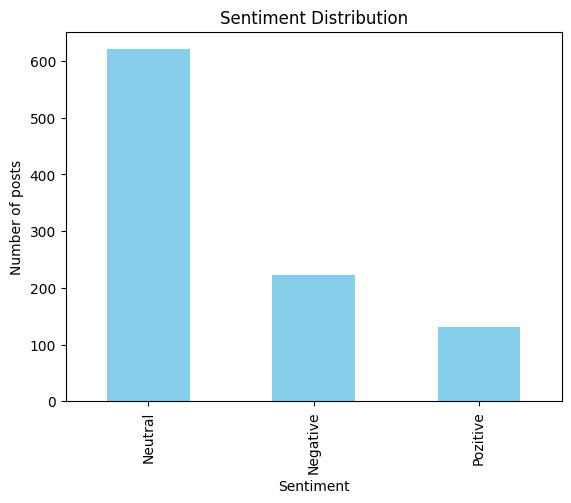

In [87]:
# plot sentiment
sentiment_counts = aba_posts_sentiment['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of posts')
plt.show()


# data is unbalanced 
# several ways to deal with this:
#  - resampling methods
#  - use ensemble methods (like Random Forests or Gradient Boosting)

# how to deal with unbalanced data in classification ML
# https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/

In [88]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [89]:
X, y = aba_posts_sentiment[['Document']], aba_posts_sentiment[['sentiment']]

# Split the data into training and testing sets
# because the dataset is small, cross validation will be used instead of a separate validation set
# this will increase computational resources neccesary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)


In [90]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# training set contains 779 rows / text documents  
# (this is a very small dataset for NLP; i don't expect good performance with traditional ML)
# test set contains 195 rows

((779, 1), (195, 1), (779, 1), (195, 1))

In [91]:
print('y_train:\n', y_train.value_counts(), '\n')
print('y_test:\n', y_test.value_counts())

# classes are unbalanced - accuracy will not be a good metric for evaluation
# evaluate using precision, recall and F1 (define these metrics in the actual report)

y_train:
 sentiment
Neutral      497
Negative     177
Pozitive     105
Name: count, dtype: int64 

y_test:
 sentiment
Neutral      124
Negative      45
Pozitive      26
Name: count, dtype: int64


In [92]:
%%capture
%pip install imblearn

In [93]:
# use oversmalpling ( https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)
# dataset is small and loosing info will not help ( thus no undersampling)
# oversampling risks overfitting ( but so does undersampling -> thus a limitiation of the data set )
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({'sentiment': 1})
Resample dataset shape Counter({'sentiment': 1})


In [94]:
x_ros.shape, y_ros.shape

((1491, 1), (1491, 1))

In [95]:
y_ros.value_counts()
# this training data is now balanced 
# 497 rows/documents for each category / sentiment class

sentiment
Negative     497
Neutral      497
Pozitive     497
Name: count, dtype: int64

### Tokenize with SpaCy 

(explain what SpaCy is in the report)

In [96]:
%%capture
%pip install -U pip setuptools wheel
%pip install -U spacy

In [97]:
%pip show spacy

Name: spacy
Version: 3.7.2
Summary: Industrial-strength Natural Language Processing (NLP) in Python
Home-page: https://spacy.io
Author: Explosion
Author-email: contact@explosion.ai
License: MIT
Location: /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages
Requires: catalogue, cymem, jinja2, langcodes, murmurhash, numpy, packaging, preshed, pydantic, requests, setuptools, smart-open, spacy-legacy, spacy-loggers, srsly, thinc, tqdm, typer, wasabi, weasel
Required-by: en-core-web-lg, en-core-web-md, en-core-web-sm
Note: you may need to restart the kernel to use updated packages.


In [98]:
import spacy

In [99]:
%%capture
!python3 -m spacy download en_core_web_sm # uses the small spacy model due to computation limitiations

In [100]:
nlp = spacy.load('en_core_web_sm')

In [101]:
x_ros.head(3)

,Document
0,Well that s a weird thing about it even being ...
1,Right I m getting that now as an RBT I have ol...
2,i ve been in the field a few years it will def...


In [102]:
# text is already cleaned - also keep all stopwords as these can be relevat to sentiment classification
# for ex the stop word 'not' or "don't"
# lemmatize tokens
def preprocess_lem(text):
    doc= nlp(text)
    new_text = []
    for t in doc:
        new_text.append(t.lemma_)
    return ' '.join(new_text)

In [103]:
X_train.shape

(779, 1)

In [104]:
# pre-process traning set (the original one)
X_train.loc[:, 'new_document'] =X_train['Document'].apply(preprocess_lem)
X_train.head(3)

,Document,new_document
690,Well that s a weird thing about it even being ...,well that s a weird thing about it even be cal...
892,Right I m getting that now as an RBT I have ol...,right I m get that now as an RBT I have older ...
531,i ve been in the field a few years it will def...,I ve be in the field a few year it will defini...


In [105]:
# pre-process traning set 
x_ros.loc[:, 'new_document'] = x_ros['Document'].apply(preprocess_lem)
x_ros.head(3)

,Document,new_document
0,Well that s a weird thing about it even being ...,well that s a weird thing about it even be cal...
1,Right I m getting that now as an RBT I have ol...,right I m get that now as an RBT I have older ...
2,i ve been in the field a few years it will def...,I ve be in the field a few year it will defini...


In [106]:
# difference in text before and after preprocessing
doc_text = nlp(x_ros.Document[0])
doc_new_text = nlp(x_ros.new_document[0])
print([t.text for t in doc_text])
print([t.text for t in doc_new_text])

['Well', 'that', 's', 'a', 'weird', 'thing', 'about', 'it', 'even', 'being', 'called', 'ABA', 'it', 's', 'not', 'a', 'packaged', 'therapy', 'It', 's', 'an', 'analysis', 'of', 'behavior', 'we', 'look', 'for', 'maintaining', 'variables', 'of', 'problem', 'behaviors', 'and', 'there', 's', 'a', 'ton', 'of', 'different', 'ways', 'to', 'do', 'that', 'and', 'treat', 'much', 'like', 'mental', 'health', 'therapy', 'There', 'is', 'no', 'ABA', 'you', 'can', 'have', 'discrete', 'trial', 'training', 'naturalistic', 'environment', 'teaching', 'behavioral', 'skills', 'training', 'which', 'all', 'I', 'think', 'the', 'Lovaas', 'method', 'is', 'usually', 'what', 'a', 'lot', 'of', 'people', 'are', 'referring', 'to', 'as', 'awful', 'intensive', 'hours', 'a', 'week', 'at', 'the', 'table', 'with', 'lots', 'of', 'correction', 'but', 'for', 'some', 'reason', 'that', 'was', 'called', 'ABA', 'even', 'though', 'I', 'was', 'never', 'trained', 'in', 'that', 'nor', 'do', 'I', 'know', 'a', 'lot', 'of', 'practitioner

### Vectorize, Apply Classifier and Evaluate the model - uses sklearn

In [107]:
# training data
print('Augmented data:', x_ros.new_document.shape, y_ros['sentiment'].shape), 
print('Original data:', X_train.new_document.shape, y_train['sentiment'].shape)

Augmented data: (1491,) (1491,)
Original data: (779,) (779,)


In [108]:
y_ros.head(3) # classes need to be converted into numerical value

,sentiment
0,Pozitive
1,Neutral
2,Neutral


The current problem is a multiclass classification problem - there are 3 classes for the target variable.
When the data can be categorized into more than two classes, we must use a multiclass classification algorithm.

Multiclass classification can be thought of as a combination of multiple binary classifiers. There are two ways in which you approach the problem:

1. One vs Rest (OVR), in which a classifier is created for each possible class value, with a positive outcome for cases where the prediction is this class, and negative predictions for cases where the prediction is any other class. A classification problem with four possible shape classes (square, circle, triangle, hexagon) would require four classifiers that predict:

- square or not
- circle or not
- triangle or not
- hexagon or not

2. One vs One (OVO), in which a classifier for each possible pair of classes is created. The classification problem with four shape classes would require the following binary classifiers:

- square or circle
- square or triangle
- square or hexagon
- circle or triangle
- circle or hexagon
- triangle or hexagon In both approaches, the overall model that combines the classifiers generates a vector of predictions in which the probabilities generated from the individual binary classifiers are used to determine which class to predict.

Fortunately, in most machine learning frameworks, including scikit-learn, implementing a multiclass classification model is not significantly more complex than binary classification - and in most cases, the estimators used for binary classification implicitly support multiclass classification by abstracting an OVR algorithm, an OVO algorithm, or by allowing a choice of either.

(https://www.kaggle.com/code/satishgunjal/binary-multiclass-classification-using-sklearn)

In [109]:
# vectorize docuemnts using TF-DF
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(max_features=1000) # the vectorizer will only consider the top 1000 terms with the highest TF-IDF scores ( otherwise the dimentionality would be too high; also this way the most important words - freqency - will be used => noise reduction)
corpus = x_ros.new_document.tolist()
original_corpus = X_train.new_document.tolist()

vectorized_x_ros = vectorizer.fit_transform(corpus)
vectorized_X_train = vectorizer.fit_transform(original_corpus)
vectorized_x_ros.shape, vectorized_X_train.shape

# docuement vector = 1000 dimentsions (features = corpus vocab size)


((1491, 1000), (779, 1000))

In [110]:
vectorized_x_ros = pd.DataFrame(vectorized_x_ros.toarray(), columns=vectorizer.get_feature_names_out())
vectorized_x_ros.head()

,aac,aba,able,about,absolutely,abuse,abusive,academic,accept,access,...,www,yeah,year,yes,yet,yo,you,young,your,yourself
0,0.0,0.149381,0.000000,0.0,0.0,0.034590,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.027465,0.0,0.000000,0.0
1,0.0,0.048753,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2,0.0,0.025845,0.000000,0.0,0.0,0.047876,0.0,0.089835,0.0,0.0,...,0.0,0.0,0.124431,0.0,0.0,0.0,0.076028,0.0,0.054406,0.0
3,0.0,0.055261,0.102473,0.0,0.0,0.020474,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.106425,0.0,0.0,0.0,0.032513,0.0,0.023266,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


In [111]:
from sklearn.preprocessing import LabelEncoder
# encode the sentiment classes as numbers
label_encoder = LabelEncoder()
y_ros_encoded = label_encoder.fit_transform(y_ros.sentiment)
y_train_encoded = label_encoder.fit_transform(y_train.sentiment)

# get the mapping
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# print the mapping
print("Class Mapping:")
for class_label, encoded_value in class_mapping.items():
    print(f"{class_label}: {encoded_value}")


Class Mapping:
Negative: 0
Neutral: 1
Pozitive: 2


In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

# logistic regression model
multi_model = LogisticRegression(C=10, solver='lbfgs', multi_class='auto', max_iter=10000, random_state=7)

# augmented datasset
# cross-validation
num_folds = 5  
cv_scores = cross_val_score(multi_model, vectorized_x_ros, y_ros_encoded, cv=num_folds, scoring='f1_macro')

# print the cross-validation scores
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV score: {np.mean(cv_scores)}')
print(f'Standard deviation of CV scores: {np.std(cv_scores)}')


Cross-validation scores: [0.88893593 0.89003766 0.89806558 0.91279621 0.9306765 ]
Mean CV score: 0.9041023748097008
Standard deviation of CV scores: 0.0157863659943465


In [113]:
# logistic regression model
multi_model = LogisticRegression(C=10, solver='lbfgs', multi_class='auto', max_iter=10000, random_state=7)

# original dataset
# cross-validation
num_folds = 5  
cv_scores = cross_val_score(multi_model, vectorized_X_train, y_train_encoded, cv=num_folds, scoring='f1_weighted')

# print the cross-validation scores
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV score: {np.mean(cv_scores)}')
print(f'Standard deviation of CV scores: {np.std(cv_scores)}')

Cross-validation scores: [0.64956906 0.66462457 0.61347417 0.70387317 0.63679163]
Mean CV score: 0.653666519816015
Standard deviation of CV scores: 0.030191928868829647


In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# parameters for the random forest
n_estimators = 100  
max_depth = None  

# random forest model
rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=7)

# augmented datasset
# cross-validation
num_folds = 5  
cv_scores_rf = cross_val_score(rf_model, vectorized_x_ros, y_ros_encoded, cv=num_folds, scoring='f1_macro')

# print the cross-validation scores for random forest
print(f'Random Forest Cross-validation scores: {cv_scores_rf}')
print(f'Mean CV score for Random Forest: {np.mean(cv_scores_rf)}')
print(f'Standard deviation of CV scores for Random Forest: {np.std(cv_scores_rf)}')


Random Forest Cross-validation scores: [0.9066388  0.94612245 0.9559499  0.95925553 0.95603361]
Mean CV score for Random Forest: 0.9448000569097156
Standard deviation of CV scores for Random Forest: 0.01958317020332779


In [115]:
# original dataset
# cross-validation
num_folds = 5  
cv_scores_rf = cross_val_score(rf_model, vectorized_X_train, y_train_encoded, cv=num_folds, scoring='f1_weighted')

# print the cross-validation scores for random forest
print(f'Random Forest Cross-validation scores: {cv_scores_rf}')
print(f'Mean CV score for Random Forest: {np.mean(cv_scores_rf)}')
print(f'Standard deviation of CV scores for Random Forest: {np.std(cv_scores_rf)}')

Random Forest Cross-validation scores: [0.60084695 0.62355833 0.57165709 0.59857394 0.55542205]
Mean CV score for Random Forest: 0.5900116719326135
Standard deviation of CV scores for Random Forest: 0.023872269549354258


In the case of augmented dataset the better model seems to be Random Forest.<br>
In the case of the original dataset the better model seems to be regression

In [116]:
# the augmented dataset
# random forest performance seems best 
# use grid search to find better parameters
from sklearn.model_selection import GridSearchCV

# parameter grid to search - limited number as computational resources are low
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
}

# random forest model
rf_model = RandomForestClassifier(random_state=7)

# GridSearchCV object
grid_search = GridSearchCV(rf_model, param_grid, cv=num_folds, scoring='f1_macro')

# fit the grid search to the data
grid_search.fit(vectorized_x_ros, y_ros_encoded)

# print the best parameters found by GridSearchCV
print(f'Best Parameters: {grid_search.best_params_}')

# get the best model 
best_rf_model = grid_search.best_estimator_

# cross-validation with the best model
cv_scores_best_rf = cross_val_score(best_rf_model, vectorized_x_ros, y_ros_encoded, cv=num_folds)

# print the cross-validation scores for the best RF model
print(f'Best Random Forest Cross-validation scores: {cv_scores_best_rf}')
print(f'Mean CV score for the best Random Forest: {np.mean(cv_scores_best_rf)}')
print(f'Standard deviation of CV scores for the best Random Forest: {np.std(cv_scores_best_rf)}')


Best Parameters: {'max_depth': 30, 'n_estimators': 100}
Best Random Forest Cross-validation scores: [0.91638796 0.94966443 0.93624161 0.95973154 0.95973154]
Mean CV score for the best Random Forest: 0.9443514174765998
Standard deviation of CV scores for the best Random Forest: 0.01642588557474013


In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# performance on training dataset

# compute predictions
predicted_sentiments = best_rf_model.predict(vectorized_x_ros)

# compute evaluation metrics
accuracy = accuracy_score(y_ros_encoded, predicted_sentiments)
precision = precision_score(y_ros_encoded, predicted_sentiments, average='macro')  
recall = recall_score(y_ros_encoded, predicted_sentiments, average='macro') 
f1 = f1_score(y_ros_encoded, predicted_sentiments, average='macro')  
conf_matrix = confusion_matrix(y_ros_encoded, predicted_sentiments)

# print metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')

# the performance on the training set looks overfitted 


Accuracy: 0.9993293091884641
Precision: 0.999330655957162
Recall: 0.9993293091884641
F1 Score: 0.9993293085096514
Confusion Matrix:
[[497   0   0]
 [  1 496   0]
 [  0   0 497]]


In [118]:
# the original dataset
# random forest performance seems best 
# use grid search to find better parameters
from sklearn.model_selection import GridSearchCV

# parameter grid to search - limited number as computational resources are low
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

# logistic regression model
multi_model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000, random_state=7)


# GridSearchCV object
grid_search = GridSearchCV(multi_model, param_grid, cv=num_folds, scoring='f1_weighted')

# fit the grid search to the data
grid_search.fit(vectorized_X_train, y_train_encoded)

# print the best parameters found by GridSearchCV
print(f'Best Parameters: {grid_search.best_params_}')

# get the best model 
best_lr_model = grid_search.best_estimator_

# cross-validation with the best model
cv_scores_best_lr = cross_val_score(best_lr_model, vectorized_X_train, y_train_encoded, cv=num_folds, scoring='f1_weighted')

# print the cross-validation scores for the best RF model
print(f'Best Logistic Reg. Cross-validation scores: {cv_scores_best_lr}')
print(f'Mean CV score for the best Logistic Reg.: {np.mean(cv_scores_best_lr)}')
print(f'Standard deviation of CV scores for the best Logistic Reg.: {np.std(cv_scores_best_lr)}')


# with the original set (not augmented) the best performance is F1=0.65


Best Parameters: {'C': 10}
Best Logistic Reg. Cross-validation scores: [0.64956906 0.66462457 0.61347417 0.70387317 0.63679163]
Mean CV score for the best Logistic Reg.: 0.653666519816015
Standard deviation of CV scores for the best Logistic Reg.: 0.030191928868829647


In [119]:
# performance on training dataset

# compute predictions
predicted_sentiments = best_lr_model.predict(vectorized_X_train)

# compute evaluation metrics
accuracy = accuracy_score(y_train_encoded, predicted_sentiments)
precision = precision_score(y_train_encoded, predicted_sentiments, average='weighted')  
recall = recall_score(y_train_encoded, predicted_sentiments, average='weighted') 
f1 = f1_score(y_train_encoded, predicted_sentiments, average='weighted')  
conf_matrix = confusion_matrix(y_train_encoded, predicted_sentiments)

# print metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')

# LR seems to be overfitting the training data 


Accuracy: 0.993581514762516
Precision: 0.993612323491656
Recall: 0.993581514762516
F1 Score: 0.9935632650029118
Confusion Matrix:
[[176   1   0]
 [  1 496   0]
 [  0   3 102]]


#### Evaluate the best model on test data

In [120]:
# encode target test labels
y_test_encoded = label_encoder.fit_transform(y_test.sentiment)

In [121]:
# tokenize test data
X_test.loc[:, 'new_document'] = X_test['Document'].apply(preprocess_lem)
# vectorize test data
vectorized_X_test = vectorizer.transform(X_test.new_document)
vectorized_X_test = pd.DataFrame(vectorized_X_test.toarray(), columns=vectorizer.get_feature_names_out())
vectorized_X_test.head(2)


,aac,aba,able,about,absolutely,abuse,abusive,academic,accept,access,...,www,yeah,year,yes,yet,yo,you,young,your,yourself
0,0.0,0.000000,0.0,0.167407,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.212457,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
1,0.0,0.047802,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.06406,0.0,0.0,0.0


In [122]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# performance on test dataset RF

# compute predictions
predicted_sentiments = best_rf_model.predict(vectorized_X_test)

# compute evaluation metrics
accuracy = accuracy_score(y_test_encoded, predicted_sentiments)
precision = precision_score(y_test_encoded, predicted_sentiments, average='weighted')  
recall = recall_score(y_test_encoded, predicted_sentiments, average='weighted')  
f1 = f1_score(y_test_encoded, predicted_sentiments, average='weighted')  
conf_matrix = confusion_matrix(y_test_encoded, predicted_sentiments)

# print metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')


# as expected the random forest does not perform well on the current dataset -> see confusion matrix
# the model is overfitted to the training data -> it seems to predict well the neutral class ( the majority class )



Accuracy: 0.6666666666666666
Precision: 0.5683333333333334
Recall: 0.6666666666666666
F1 Score: 0.6108932461873638
Confusion Matrix:
[[ 21  24   0]
 [ 15 109   0]
 [  4  22   0]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


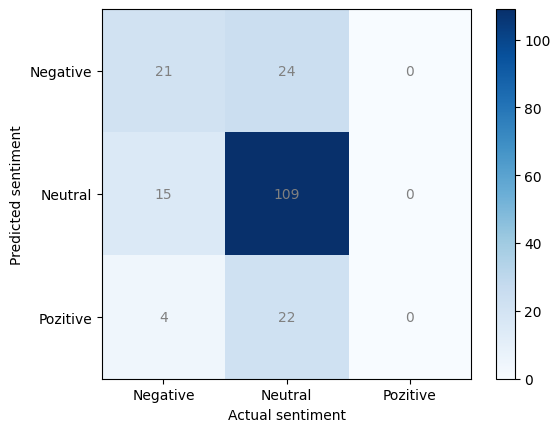

In [123]:
sentiment_classes = ['Negative', 'Neutral','Pozitive']
# Negative: 0
# Neutral: 1
# Pozitive: 2

# plot confusion matrix for test set
plt.imshow(conf_matrix, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(sentiment_classes))
plt.xticks(tick_marks, sentiment_classes)
plt.yticks(tick_marks, sentiment_classes)
plt.xlabel("Actual sentiment")
plt.ylabel("Predicted sentiment")

# display the values in each cell
for i in range(len(sentiment_classes)):
    for j in range(len(sentiment_classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='grey')
plt.show()

# the model can predict well the neutral text 
# it perfoms worst with Pozitive examples
# this is to be expected as the dataset is very imbalanced and the model has access to a lot of examples for the neutral class 
# not many unique examples for the other 2 classes
# this is consistent with Hartmann et al (2023) findings that traditional ML methods do not perform much better than chance for 3 class sentiment classification

In [124]:
# performance on test dataset LR

# compute predictions
predicted_sentiments = best_lr_model.predict(vectorized_X_test)

# compute evaluation metrics
accuracy = accuracy_score(y_test_encoded, predicted_sentiments)
precision = precision_score(y_test_encoded, predicted_sentiments, average='weighted')  
recall = recall_score(y_test_encoded, predicted_sentiments, average='weighted')  
f1 = f1_score(y_test_encoded, predicted_sentiments, average='weighted')  
conf_matrix = confusion_matrix(y_test_encoded, predicted_sentiments)

# print metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.717948717948718
Precision: 0.6996390615799669
Recall: 0.717948717948718
F1 Score: 0.6981911141020835
Confusion Matrix:
[[ 20  22   3]
 [  8 111   5]
 [  3  14   9]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


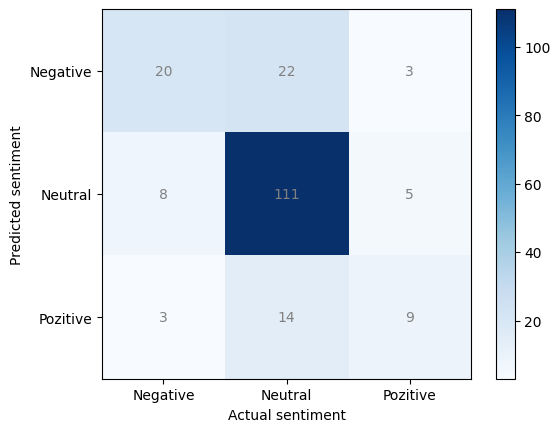

In [125]:
# plot confusion matrix for test set
plt.imshow(conf_matrix, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(sentiment_classes))
plt.xticks(tick_marks, sentiment_classes)
plt.yticks(tick_marks, sentiment_classes)
plt.xlabel("Actual sentiment")
plt.ylabel("Predicted sentiment")

# display the values in each cell
for i in range(len(sentiment_classes)):
    for j in range(len(sentiment_classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='grey')
plt.show()

# the LR model predicted almost all posts to tbe negative 
# performance no better than chance F1 Score: 0.55

Augmenting the dataset seem to help increase perfomance, but the RF model built on this data is overfitted. For text data, with high dimentsionality, and small number of samples, traditional machine learning techniques did not perform better than chance. 

## FASTTEXT

Vectorization using shallow neural nets (FastText)
https://fasttext.cc/ - use word embedings to reduce dimentsionality 


https://towardsdatascience.com/fasttext-under-the-hood-11efc57b2b3

why? Argued to result in better word representations and also deals with OOV problem + can be be easly trained to create vectors specific to the current dataset.

“FastText is one of the most novel techniques, developed by Bojanowski et al. [35]. The main concern addressed by this method is the fact that its predecessors ignore the morphology of words by assigning a distinct vector to each word.” (Gasparetto et al., 2022, p. 10) (pdf)

“FastText is able to handle OOV words, as long as it has seen its composing n-grams during training. Both GloVe and Word2Vec are instead unable to handle the case of OOV words.” (Gasparetto et al., 2022, p. 10) (pdf) - FastText unit on which the neural net is trained is character n-gram.


https://fasttext.cc/docs/en/supervised-tutorial.html:

FastText uses a simple neural network architecture for text classification. It consists of an input layer (for the text representation), a hidden layer, and an output layer. The output layer has as many neurons as there are categories, and it uses softmax activation to compute class probabilities (default). - as sentiment classes in this project are mutually exclusive, the default softmax activation function will be used. 

In [126]:
%%capture
%pip install fasttext